In [3]:
import pickle

fpath = '/home/phisch/multimodal/test_results/zero_shot/full_dataset/18_templates/9nvg456i_zero_shot_data_dict.p'
with open(fpath, 'rb') as f:
    data = pickle.load(f)
data


{'zeroshot_Caltech101': {'ConfusionMatrix': array([[216,   0,   0, ...,   0,   0,   0],
         [184,   0,   0, ...,   0,   0,   0],
         [  0,   0, 131, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,  26,   0,   0],
         [  0,   0,   0, ...,   0,   5,   0],
         [  0,   0,   0, ...,   0,   1,   0]]),
  'Top1Accuracy': 0.4597320258617401,
  'Top3Accuracy': 0.6598472595214844,
  'Top5Accuracy': 0.7206454277038574},
 'zeroshot_Caltech256': {'ConfusionMatrix': array([[ 0,  0,  0, ...,  0,  0,  1],
         [ 0, 67,  0, ...,  0,  0,  0],
         [ 0,  0, 93, ...,  0,  1,  0],
         ...,
         [ 0,  0,  1, ...,  5,  0,  0],
         [ 0,  0,  0, ...,  0, 21,  0],
         [ 9,  2,  0, ...,  0,  1,  1]]),
  'Top1Accuracy': 0.3630385994911194,
  'Top3Accuracy': 0.5068409442901611,
  'Top5Accuracy': 0.5660200119018555},
 'zeroshot_CIFAR10': {'ConfusionMatrix': array([[3139,   71, 1210,  165,    0,    9,  202,  120,   32,   52],
         [ 957, 2035,  118, 

In [2]:
import pickle

fpath = '/home/phisch/multimodal/test_results/zero_shot/full_dataset/5_templates/9nvg456i_zero_shot_with_5_templates_data_dict.p'
with open(fpath, 'rb') as f:
    data = pickle.load(f)
data
for dataset_name, dataset_info in data.items():
    if dataset_name == "__config__":
        continue
    accuracy = dataset_info.get('Top1Accuracy')
    print(f"{dataset_name}: {accuracy}")

zeroshot_Caltech101: 0.4578590989112854
zeroshot_Caltech256: 0.36115989089012146
zeroshot_CIFAR10: 0.5020999908447266
zeroshot_CIFAR100: 0.17980000376701355
zeroshot_DTD: 0.10797872394323349
zeroshot_FGVCAircraft: 0.00869826041162014
zeroshot_Food101: 0.10984818637371063
zeroshot_OxfordIIITPet: 0.09293477982282639
zeroshot_StanfordCars: 0.011910608969628811
zeroshot_STL10: 0.7720000147819519


In [25]:
import os
import pickle
import pandas as pd

base_dir = '/home/phisch/multimodal/test_results/zero_shot/full_dataset'
results = []

for templates_folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, templates_folder)
    if not os.path.isdir(folder_path):
        continue
    for fname in os.listdir(folder_path):
        if not fname.endswith('.p'):
            continue
        model_name = fname.split('_zero_shot')[0]
        file_path = os.path.join(folder_path, fname)
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        for dataset_name, dataset_info in data.items():
            if dataset_name == "__config__":
                continue
            results.append({
                'Templates': templates_folder,
                'Model': model_name,
                'Dataset': dataset_name,
                'Top1Accuracy': dataset_info.get('Top1Accuracy'),
                'Top3Accuracy': dataset_info.get('Top3Accuracy'),
                'Top5Accuracy': dataset_info.get('Top5Accuracy'),
            })

df = pd.DataFrame(results)
df['Templates_num'] = df['Templates'].str.extract(r'(\d+)').astype(int)

# Define which datasets are general and which are fine-grained
general_datasets = [
    'zeroshot_CIFAR10', 'zeroshot_CIFAR100', 'zeroshot_ImageNet', 'zeroshot_Caltech101', "Caltech256", "STL10"
]
finegrained_datasets = [
    "zeroshot_DTD", "zeroshot_FGVCAircraft", "zeroshot_Food101", "zeroshot_OxfordIIITPet", "zeroshot_STL10", "zeroshot_StanfordCars"
]

# Add average rows for all datasets, general, and fine-grained per model/templates_num/templates
avg_rows = []
for (model, templates_num, templates), group in df.groupby(['Model', 'Templates_num', 'Templates']):
    # All datasets
    avg_all = group['Top1Accuracy'].mean()
    avg_rows.append({
        'Templates': templates,
        'Templates_num': templates_num,
        'Model': model,
        'Dataset': 'Average_All',
        'Top1Accuracy': avg_all
    })
    # General datasets
    general_group = group[group['Dataset'].isin(general_datasets)]
    if not general_group.empty:
        avg_general = general_group['Top1Accuracy'].mean()
        avg_rows.append({
            'Templates': templates,
            'Templates_num': templates_num,
            'Model': model,
            'Dataset': 'Average_General',
            'Top1Accuracy': avg_general
        })
    # Fine-grained datasets
    fine_group = group[group['Dataset'].isin(finegrained_datasets)]
    if not fine_group.empty:
        avg_fine = fine_group['Top1Accuracy'].mean()
        avg_rows.append({
            'Templates': templates,
            'Templates_num': templates_num,
            'Model': model,
            'Dataset': 'Average_FineGrained',
            'Top1Accuracy': avg_fine
        })

# Concatenate the average rows to the original dataframe
df = pd.concat([df, pd.DataFrame(avg_rows)], ignore_index=True)

df = df[~df['Model'].isin(['9v1wy0vb', 'zathvtrx'])]
# Now df_with_avgs contains the original data plus average rows
display(df[df['Dataset'].str.contains('Average')].head())

# Create the pivot table with Templates_num in the index for sorting
pivot_df = df.pivot_table(
    index=['Model', 'Templates_num', 'Templates'],
    columns='Dataset',
    values='Top1Accuracy'
)

# Sort by Model and Templates_num
pivot_df = pivot_df.sort_index(level=['Model', 'Templates_num'])

display(pivot_df)

,Templates,Model,Dataset,Top1Accuracy,Top3Accuracy,Top5Accuracy,Templates_num
240,0_templates,93t3xgrr,Average_All,0.227323,NaN,NaN,0
241,0_templates,93t3xgrr,Average_General,0.319973,NaN,NaN,0
242,0_templates,93t3xgrr,Average_FineGrained,0.170461,NaN,NaN,0
243,1_template,93t3xgrr,Average_All,0.236198,NaN,NaN,1
244,1_template,93t3xgrr,Average_General,0.321218,NaN,NaN,1


Dataset                              Average_All  Average_FineGrained  \
Model    Templates_num Templates                                        
93t3xgrr 0             0_templates      0.227323             0.170461   
         1             1_template       0.236198             0.175298   
         5             5_templates      0.251932             0.181422   
         18            18_templates     0.250827             0.185136   
9nvg456i 0             0_templates      0.236153             0.175525   
         1             1_template       0.242498             0.177849   
         5             5_templates      0.260429             0.183895   
         18            18_templates     0.257441             0.183970   
oc0g8fql 0             0_templates      0.231196             0.173529   
         1             1_template       0.242513             0.178782   
         5             5_templates      0.244113             0.178425   
         18            18_templates     0.249156             0.181096   
yh1adr3g 0             0_templates      0.217639             0.178774   
         1             1_template       0.236376             0.184794   
         5             5_templates      0.249742             0.188861   
         18            18_templates     0.250460             0.190206   

Dataset                              Average_General  zeroshot_CIFAR10  \
Model    Templates_num Templates                                         
93t3xgrr 0             0_templates          0.319973           0.43894   
         1             1_template           0.321218           0.35532   
         5             5_templates          0.358666           0.44228   
         18            18_templates         0.347392           0.41284   
9nvg456i 0             0_templates          0.337999           0.44928   
         1             1_template           0.338396           0.43082   
         5             5_templates          0.379920           0.50210   
         18            18_templates         0.369184           0.46840   
oc0g8fql 0             0_templates          0.325536           0.42340   
         1             1_template           0.338461           0.43182   
         5             5_templates          0.340353           0.40724   
         18            18_templates         0.351031           0.42382   
yh1adr3g 0             0_templates          0.275872           0.38638   
         1             1_template           0.305010           0.35328   
         5             5_templates          0.336693           0.41018   
         18            18_templates         0.336218           0.39958   

Dataset                              zeroshot_CIFAR100  zeroshot_Caltech101  \
Model    Templates_num Templates                                              
93t3xgrr 0             0_templates             0.12752             0.393459   
         1             1_template              0.13362             0.474715   
         5             5_templates             0.15324             0.480478   
         18            18_templates            0.15102             0.478317   
9nvg456i 0             0_templates             0.15714             0.407578   
         1             1_template              0.15806             0.426307   
         5             5_templates             0.17980             0.457859   
         18            18_templates            0.17942             0.459732   
oc0g8fql 0             0_templates             0.14390             0.409307   
         1             1_template              0.16028             0.423282   
         5             5_templates             0.17008             0.443740   
         18            18_templates            0.17372             0.455554   
yh1adr3g 0             0_templates             0.10454             0.336695   
         1             1_template              0.13890             0.422850   
         5             5_templates             0.14982             0.450079   
         

In [13]:
import matplotlib.pyplot as plt

def plot_accuracy_vs_templates(df, dataset, accuracy_col='Top1Accuracy'):
    """
    Plots accuracy vs. number of templates for each model on a given dataset.
    Only x-ticks for the actual number of templates present in the data are shown.
    """
    plt.figure(figsize=(8, 5))
    xticks_set = set()
    for model in df['Model'].unique():
        model_df = df[(df['Model'] == model) & (df['Dataset'] == dataset)]
        model_df = model_df.sort_values('Templates_num')
        plt.plot(model_df['Templates_num'], model_df[accuracy_col], marker='o', label=model)
        xticks_set.update(model_df['Templates_num'].tolist())
    xticks_sorted = sorted(xticks_set)
    plt.xlabel('Number of Templates')
    plt.ylabel(accuracy_col)
    plt.title(f'{accuracy_col} vs. Number of Templates on {dataset}')
    plt.legend()
    plt.grid(True)
    plt.xticks(xticks_sorted)
    plt.tight_layout()
    plt.show()

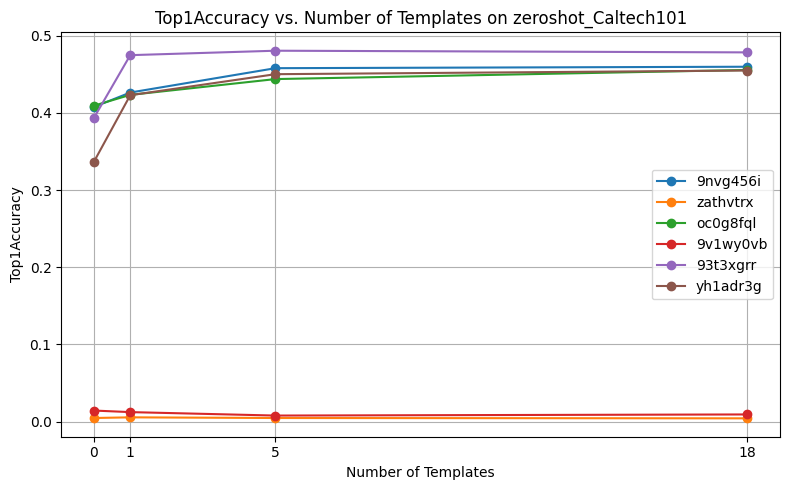

In [14]:
plot_accuracy_vs_templates(df, 'zeroshot_Caltech101')

In [ ]:
def plot_all_datasets_accuracies(df, accuracy_col='Top1Accuracy'):
    """
    Plots accuracy vs. number of templates for each model on all datasets in separate subplots.
    The x-axis is categorical, so distances between template counts are equal.
    Adds a horizontal line for random chance for each dataset if available.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    random_chance_dict = {
        "zeroshot_ImageNet": 1/100.,
        'zeroshot_Caltech101': 1/101.,
        'Caltech256': 1/256.,
        'zeroshot_CIFAR10': 1/10.,
        'zeroshot_CIFAR100': 1/100.,
        'zeroshot_DTD': 1/47.,
        'zeroshot_OxfordIIITPet': 1./37,
        'zeroshot_StanfordCars': 1./196,
        'zeroshot_FGVCAircraft': 1./102,
        'zeroshot_Food101': 1./101,
        'zeroshot_STL10': 1./10,
        'Places365': 1./365,
        # Add more mappings if needed
    }

    datasets = df['Dataset'].unique()
    n = len(datasets)
    ncols = 2
    nrows = (n + ncols - 1) // ncols

    all_templates = sorted(df['Templates_num'].unique())
    all_templates_str = [str(t) for t in all_templates]

    fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows), squeeze=False)
    axes = axes.flatten()

    for i, dataset in enumerate(datasets):
        ax = axes[i]
        for model in df['Model'].unique():
            model_df = df[(df['Model'] == model) & (df['Dataset'] == dataset)]
            model_df = model_df.set_index('Templates_num').reindex(all_templates)
            ax.plot(
                range(len(all_templates)),  # categorical positions
                model_df[accuracy_col],
                marker='o',
                label=model
            )
        # Add random chance line if available
        rc_key = dataset
        if rc_key not in random_chance_dict and rc_key.startswith("zeroshot_"):
            rc_key = rc_key.replace("zeroshot_", "")
        if rc_key in random_chance_dict:
            ax.axhline(random_chance_dict[rc_key], color='red', linestyle='--', label='Random Chance')
        ax.set_xlabel('Number of Templates')
        ax.set_ylabel(accuracy_col)
        ax.set_title(f'{accuracy_col} vs. Number of Templates\non {dataset}')
        ax.legend()
        ax.grid(True)
        ax.set_xticks(range(len(all_templates)))
        ax.set_xticklabels(all_templates_str)
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

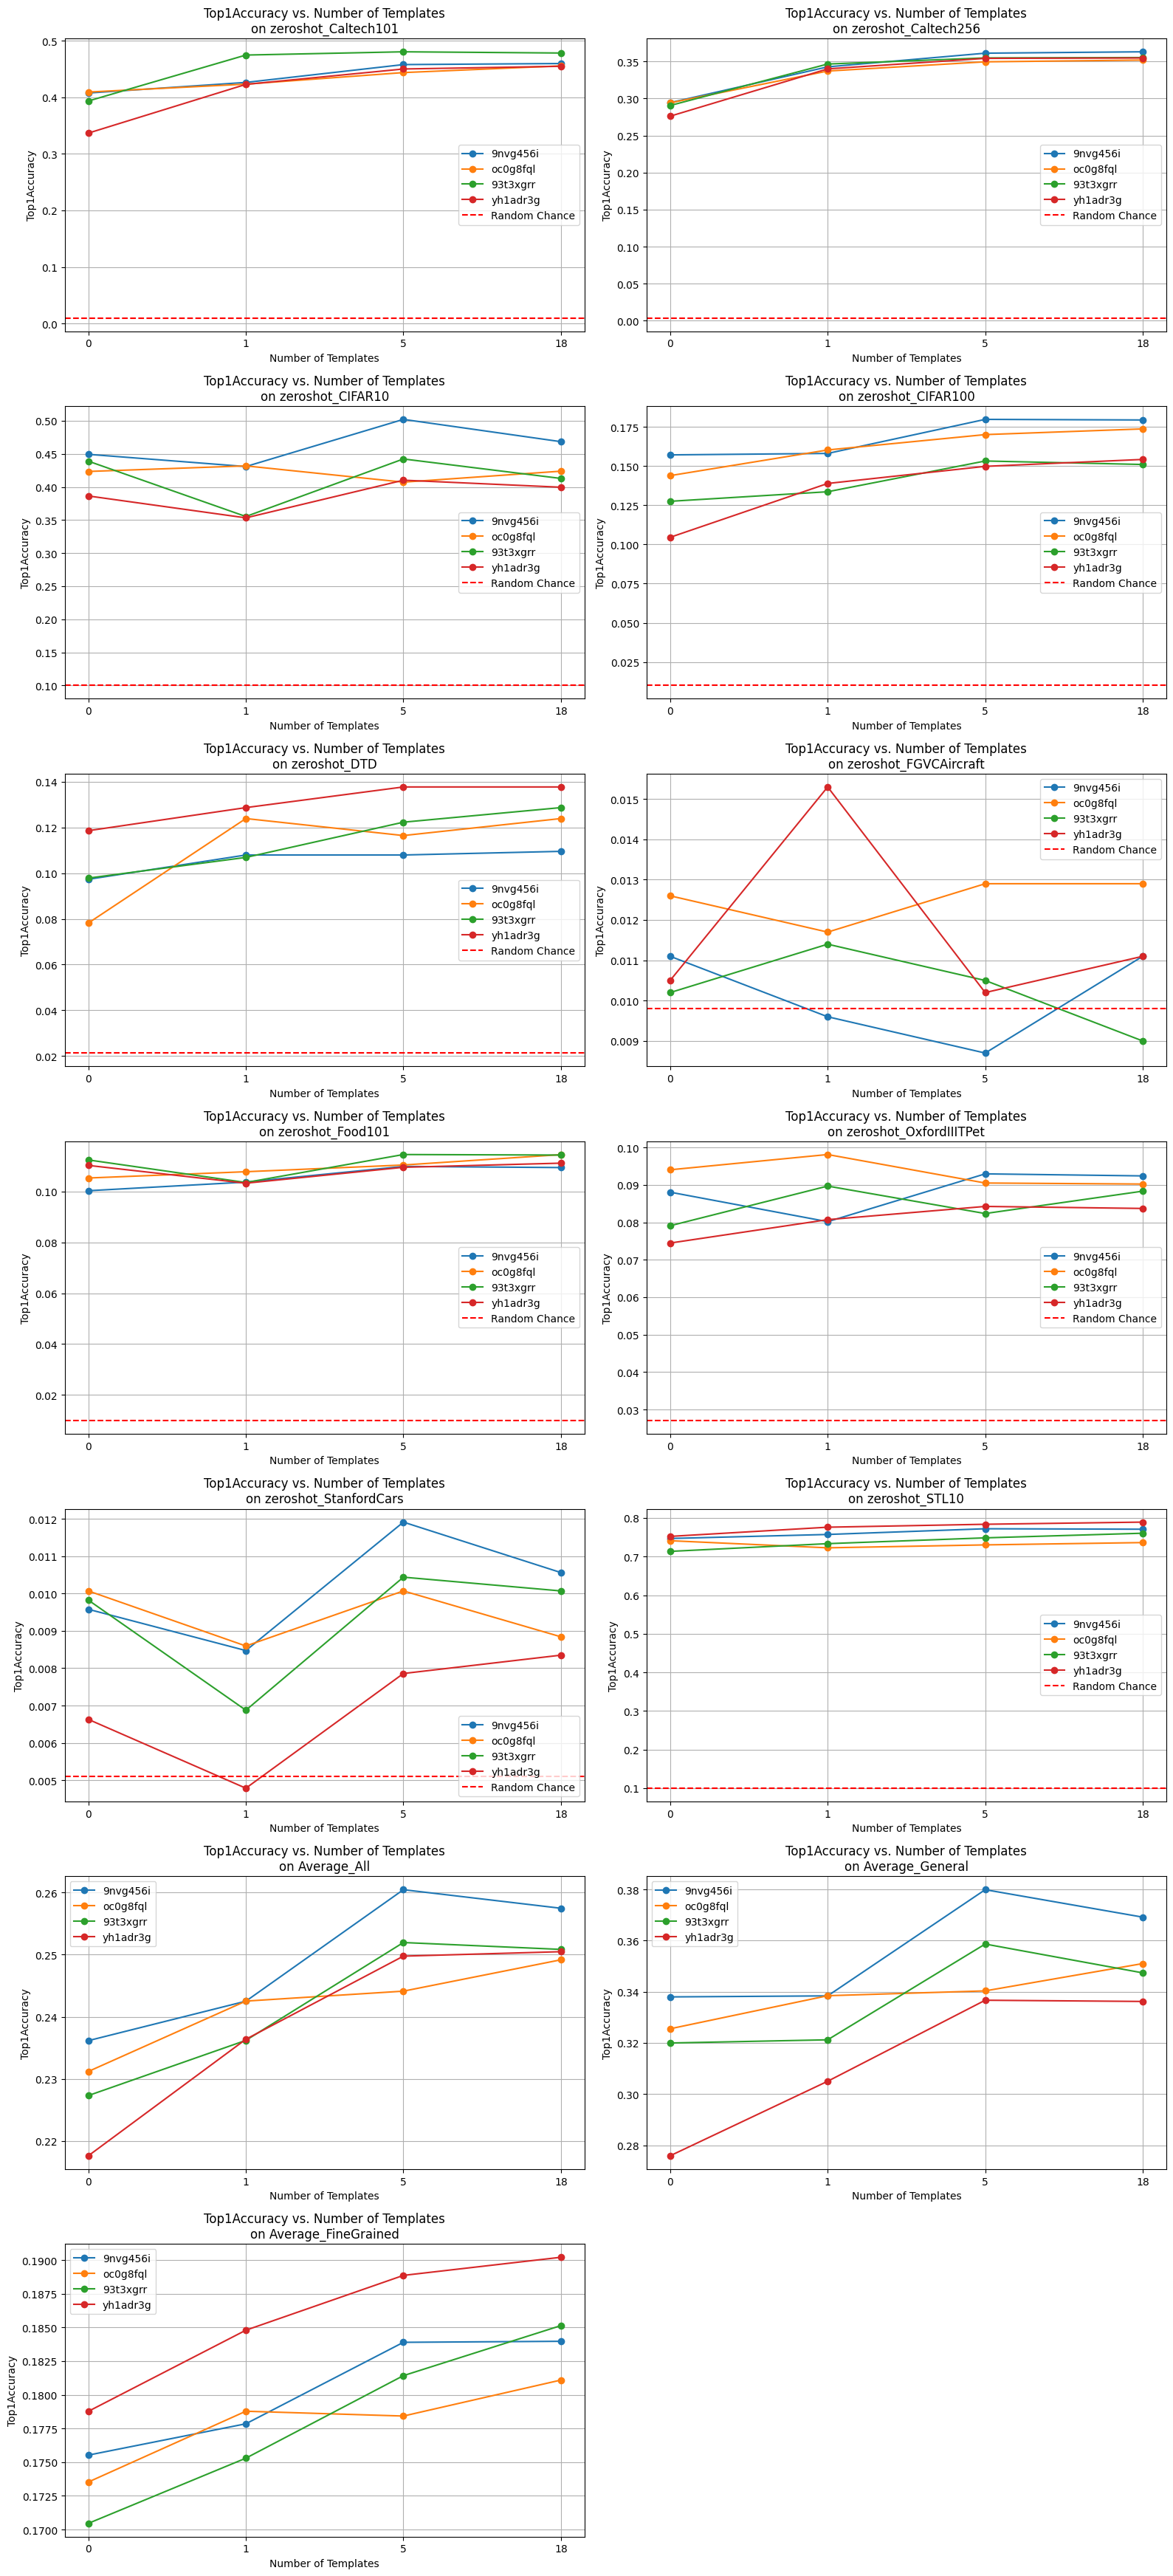

In [29]:
plot_all_datasets_accuracies(df)